# Understanding the MSprime Simulation Script

This Python script is designed to simulate genetic data using the `msprime` library, with a focus on modeling inheritance patterns through predefined pedigree structures. The script simulates genetic recombination, mutation, and tracks Identity By Descent (IBD) segments across generations. Below is a comprehensive explanation of its key components and workflow.

## Core Functionality

The script performs the following major functions:

1. **Pedigree-Based Genetic Simulation**: Simulates genetic inheritance within a defined family structure
2. **Multi-Chromosome Modeling**: Handles multiple chromosomes with appropriate recombination rates between them
3. **IBD Segment Analysis**: Identifies and tracks segments of DNA that are identical by descent
4. **MRCA (Most Recent Common Ancestor) Calculation**: Determines the most recent common ancestors for pairs of individuals

## Key Components

### 1. Setup and Configuration

- **Command Line Arguments**: Configurable parameters include:
  - Number of simulation replicates
  - Minimum IBD segment length
  - Maximum time to look back for IBD segments
  - Mutation rate
  - Chromosomes to simulate
  - Genetic map to use

- **Environment Setup**: The script attempts to locate a `.env` file with predefined directory paths for storing results, data, and references.

### 2. Genetic Modeling

- **Demographic Model**: Uses the "American Admixture" model from the `stdpopsim` library (Browning et al. 2011)
- **Recombination Maps**: Implements chromosome-specific genetic maps to model realistic recombination rates
- **Inter-Chromosome Recombination**: Sets a high recombination rate (log(2)) between chromosomes to ensure independence

### 3. Pedigree Handling

- **Pedigree Loading**: Reads a family structure from a tab-delimited file (`pedigree.fam`)
- **Generation Assignment**: Automatically determines generational relationships among individuals
- **Pedigree Visualization**: Creates network diagrams of the family tree structure

### 4. Simulation Pipeline

1. **Initialize Pedigree**: Creates a fixed pedigree structure in `msprime`
2. **Generate Tree Sequences**: Simulates genetic inheritance through the pedigree
3. **Add Mutations**: Applies mutations using specified mutation rates
4. **Extract IBD Segments**: Identifies segments shared between individuals that are identical by descent
5. **Calculate MRCAs**: Determines the most recent common ancestor for each pair of individuals

### 5. Output Generation

- **Tree Sequence Files**: Saves the raw simulation data as `.trees` files
- **IBD Segment Data**: Creates CSV files with detailed information about IBD segments
- **MRCA Information**: Generates comprehensive pairwise MRCA data
- **VCF Generation**: Converts simulations to Variant Call Format (VCF) files for compatibility with genetic analysis tools

## Key Functions Explained

### `build_rate_map()`
Creates a genetic recombination map integrating multiple chromosomes into a single continuous sequence.

### `assign_generations()`
Analyzes a pedigree to determine which generation each individual belongs to, working through parent-child relationships.

### `add_individuals_to_pedigree()`
Constructs the `msprime` pedigree structure by adding individuals with their appropriate parent relationships.

### `extract_ibd_segments()`
Identifies segments of DNA shared between individuals that are identical by descent, considering minimum length thresholds.

### `calculate_comprehensive_pairwise_mrca()`
For each pair of individuals, determines all distinct most recent common ancestors and the genomic regions each MRCA is responsible for.

### `process_tree_sequence()`
Integrated function that processes a tree sequence to extract genetic information, IBD segments, and MRCA calculations.

## Technical Implementation Details

- **Multi-Chromosome Modeling**: Creates a continuous sequence with high recombination "breaks" between chromosomes
- **IBD Segment Tracking**: Uses interval trees to efficiently track overlapping genomic segments
- **Position Mapping**: Maintains mappings between continuous simulation coordinates and chromosome-specific coordinates
- **Parallelization**: Runs multiple independent replicates of the simulation

## Applications

This script is valuable for:

1. **Genetic Genealogy Research**: Modeling how DNA segments are inherited through generations
2. **IBD Pattern Analysis**: Studying patterns of genetic sharing between relatives
3. **Algorithm Validation**: Testing methods for relationship prediction from genetic data
4. **Educational Purposes**: Demonstrating principles of genetic inheritance in complex pedigrees

## Output Analysis

The primary outputs include:

- **IBD Segment Files**: Data on which genomic segments are shared between which individuals
- **MRCA Data**: Information about the common ancestors responsible for each shared segment
- **VCF Files**: Genetic variant data in standard format for further analysis

These outputs can be used to analyze relationships between genetic sharing patterns and genealogical relationships, particularly for validating methods that predict relationships from observed IBD patterns.

In [ ]:
!poetry install --no-root

### Run the following command in your terminal window.

In [ ]:
%%bash

# RUN IN TERMINAL WINDOW

poetry run python scripts_support/msprime_simulation.py --which-chromosomes 21 --num-replicates 2

# Runtime: 0:0:17 - 0:0:34

# poetry run python scripts_support/msprime_simulation.py --which-chromosomes 1 --num-replicates 2

# Runtime: 0:15:37

In [10]:
from pathlib import Path
from dotenv import load_dotenv
import os
import logging
import tskit

In [11]:
def find_comp_gen_dir():
    """Find the computational_genetic_genealogy directory by searching up from current directory."""
    current = Path.cwd()
    
    # Search up through parent directories
    while current != current.parent:
        # Check if target directory exists in current path
        target = current / 'computational_genetic_genealogy'
        if target.is_dir():
            return target
        # Move up one directory
        current = current.parent
    
    raise FileNotFoundError("Could not find computational_genetic_genealogy directory")

def load_env_file():
    """Find and load the .env file from the computational_genetic_genealogy directory."""
    try:
        # Find the computational_genetic_genealogy directory
        comp_gen_dir = find_comp_gen_dir()
        
        # Look for .env file
        env_path = comp_gen_dir / '.env'
        if not env_path.exists():
            print(f"Warning: No .env file found in {comp_gen_dir}")
            return None
        
        # Load the .env file
        load_dotenv(env_path, override=True)
        print(f"Loaded environment variables from: {env_path}")
        return env_path
        
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None

# Use the function
env_path = load_env_file()

working_directory = os.getenv('PROJECT_WORKING_DIR', default=None)
data_directory = os.getenv('PROJECT_DATA_DIR', default=None)
references_directory = os.getenv('PROJECT_REFERENCES_DIR', default=None)
results_directory = os.getenv('PROJECT_RESULTS_DIR', default=None)
utils_directory = os.getenv('PROJECT_UTILS_DIR', default=None)

os.environ["WORKING_DIRECTORY"] = working_directory
os.environ["DATA_DIRECTORY"] = data_directory
os.environ["REFERENCES_DIRECTORY"] = references_directory
os.environ["RESULTS_DIRECTORY"] = results_directory
os.environ["UTILS_DIRECTORY"] = utils_directory

print(f"Working Directory: {working_directory}")
print(f"Data Directory: {data_directory}")
print(f"References Directory: {references_directory}")
print(f"Results Directory: {results_directory}")
print(f"Utils Directory: {utils_directory}")

os.chdir(working_directory)
print(f"The current directory is {os.getcwd()}")

Loaded environment variables from: /home/lakishadavid/computational_genetic_genealogy/.env
Working Directory: /home/lakishadavid/computational_genetic_genealogy
Data Directory: /home/lakishadavid/computational_genetic_genealogy/data
References Directory: /home/lakishadavid/computational_genetic_genealogy/references
Results Directory: /home/lakishadavid/computational_genetic_genealogy/results
Utils Directory: /home/lakishadavid/computational_genetic_genealogy/utils
The current directory is /home/lakishadavid/computational_genetic_genealogy


# Introduction to Tree Sequences (ts)

Tree sequences are a powerful data structure developed for efficient storage and analysis of genetic ancestry information. They were developed as part of the [tskit](https://tskit.dev/) project to address computational challenges in population genetics.

## What is a Tree Sequence?

A tree sequence is a compact representation of:

1. **Ancestral Relationships**: The genealogical trees that relate individuals across different segments of the genome
2. **Genetic Variation**: The mutations that occurred along these ancestral lineages
3. **Genomic Locations**: The specific positions where recombination changes the ancestry pattern

## Key Benefits

- **Storage Efficiency**: Tree sequences can store complete evolutionary histories in a fraction of the space compared to traditional formats
- **Computational Speed**: Many population genetic analyses can be performed orders of magnitude faster
- **Lossless Compression**: Complete genealogical information is preserved, allowing exact reconstruction of genetic data

## Common Operations

```python
import tskit

# Load a tree sequence file
ts = tskit.load("simulation.trees")

# Basic information
print(f"Sequence length: {ts.sequence_length}")
print(f"Sample size: {ts.num_samples}")
print(f"Number of trees: {ts.num_trees}")
print(f"Number of mutations: {ts.num_mutations}")

# Iterate through trees along the genome
for tree in ts.trees():
    print(f"Tree covers positions {tree.interval}")
    
# Find shared ancestry
mrca = tree.mrca(sample1, sample2)  # Most recent common ancestor

# Calculate genetic statistics
diversity = ts.diversity()
```

## Usage in Simulations

Tree sequences are the primary output format from msprime simulations, preserving the full evolutionary history generated during the simulation. This makes them ideal for:

- Calculating population genetic statistics
- Identifying identity-by-descent segments
- Analyzing recombination patterns
- Studying the effects of selection

In [ ]:
# Basic information about the tree sequence

!tskit info ${RESULTS_DIRECTORY}/msprime_tree_replicate_0.trees

- Each tree represents the ancestry at a specific segment.
- A high number of trees indicates extensive recombination in your simulation.
- Number of samples: In a tree sequence from msprime, the samples represent haploid genomic samples, which means there are 2 per sampled diploid individual (one for each chromosome copy). Divide the number of samples by 2 to get the number of sampled diploid individuals.
- Number of individuals: This includes both the sampled individuals and their ancestors in the pedigree.
- Number of nodes: This represents all nodes in the tree sequence, including both sample nodes and ancestral nodes. Each node corresponds to a specific genomic segment in a specific individual.

In [ ]:
# For more detailed information

!tskit info ${RESULTS_DIRECTORY}/msprime_tree_replicate_0.trees

In [19]:
# Load the tree sequence
ts0 = tskit.load(f"{results_directory}/msprime_tree_replicate_0.trees")

# Print summary information
print(f"Sequence length: {ts0.sequence_length}")
print(f"Number of trees: {ts0.num_trees}")
print(f"Number of individuals: {ts0.num_individuals}")
print(f"Number of mutations: {ts0.num_mutations}")

Sequence length: 46709983.0
Number of trees: 67307
Number of individuals: 52
Number of mutations: 60905


Run the next cell if your `--num-replicates` value was more than 1.

In [20]:
# Load the tree sequence
ts1 = tskit.load(f"{results_directory}/msprime_tree_replicate_1.trees")

# Print summary information
print(f"Sequence length: {ts1.sequence_length}")
print(f"Number of trees: {ts1.num_trees}")
print(f"Number of individuals: {ts1.num_individuals}")
print(f"Number of mutations: {ts1.num_mutations}")

Sequence length: 46709983.0
Number of trees: 68158
Number of individuals: 52
Number of mutations: 59918


### Explore IBD segments and MRCA data

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tskit

# Set plotting styles
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.2)

In [25]:
# --- 1. Load the tree sequence ---
replicate = 0  # Change this to analyze a different replicate
ts_file = os.path.join(results_directory, f"msprime_tree_replicate_{replicate}.trees")
ts = tskit.load(ts_file)

print(f"Loaded tree sequence from {ts_file}")
print(f"Sequence length: {ts.sequence_length:,.0f} bp")
print(f"Number of trees: {ts.num_trees:,}")
print(f"Number of samples: {ts.num_samples:,}")
print(f"Number of individuals: {ts.num_individuals:,}")
print(f"Number of nodes: {ts.num_nodes:,}")
print(f"Number of mutations: {ts.num_mutations:,}")

Loaded tree sequence from /home/lakishadavid/computational_genetic_genealogy/results/msprime_tree_replicate_0.trees
Sequence length: 46,709,983 bp
Number of trees: 68,901
Number of samples: 20
Number of individuals: 52
Number of nodes: 43,220
Number of mutations: 62,345


- Each tree represents the ancestry at a specific segment.
- A high number of trees indicates extensive recombination in your simulation.
- Number of samples: In a tree sequence from msprime, the samples represent haploid genomic samples, which means there are 2 per sampled diploid individual (one for each chromosome copy). Divide the number of samples by 2 to get the number of sampled diploid individuals.
- Number of individuals: This includes both the sampled individuals and their ancestors in the pedigree.
- Number of nodes: This represents all nodes in the tree sequence, including both sample nodes and ancestral nodes. Each node corresponds to a specific genomic segment in a specific individual.

In [26]:
# --- 2. Load the analysis results ---
ibd_file = os.path.join(results_directory, f"merged_ibd_segments.csv")
mrca_file = os.path.join(results_directory, f"merged_pairwise_mrca.csv")

# Check if files exist (run the analysis script first if they don't)
if not os.path.exists(ibd_file) or not os.path.exists(mrca_file):
    print("Analysis files not found. Run the analyze_tree_sequences.py script first.")
else:
    ibd_df = pd.read_csv(ibd_file)
    mrca_df = pd.read_csv(mrca_file)
    
    print(f"\nLoaded IBD segments data: {len(ibd_df)} segments")
    print(f"Loaded pairwise MRCA data: {len(mrca_df)} pairs")
    
    display(ibd_df.head())
    display(ibd_df.tail())
    display(mrca_df.head())
    display(mrca_df.tail())
    
    # Summary statistics of IBD segment lengths
    print("\nSummary of IBD segment lengths (cM):")
    print(ibd_df['length_cm'].describe())


Loaded IBD segments data: 22 segments
Loaded pairwise MRCA data: 18 pairs


,individual1_id,node1,individual2_id,node2,chromosome,start_bp,end_bp,length_bp,length_cm,mrca_individual_id,mrca_node,tmrca
0,18_rep0,36,26_rep0,52,21,14748817,31442308,16693491,28.786825,14_rep0,29,1.0
1,18_rep0,36,37_rep0,75,21,14748817,21863260,7114443,12.268388,11_rep0,23,2.0
2,18_rep0,36,37_rep0,75,21,23292143,31442308,8150165,14.054422,11_rep0,23,2.0
3,18_rep0,36,43_rep0,86,21,10326675,13902077,3575402,6.165545,7_rep0,14,3.0
4,19_rep0,38,27_rep0,54,21,18195136,27018874,8823738,15.215955,16_rep0,32,1.0


,individual1_id,node1,individual2_id,node2,chromosome,start_bp,end_bp,length_bp,length_cm,mrca_individual_id,mrca_node,tmrca
17,19_rep1,39,27_rep1,55,21,40854724,46709983,5855259,10.097008,17_rep1,34,1.000000
18,26_rep1,53,27_rep1,54,21,10475984,13789787,3313803,5.714435,-1_rep1,235,223.665156
19,26_rep1,53,39_rep1,79,21,10475984,13789787,3313803,5.714435,-1_rep1,235,223.665156
20,27_rep1,54,39_rep1,79,21,10326675,46709983,36383308,62.740616,13_rep1,26,2.000000
21,39_rep1,78,47_rep1,95,21,41494729,44746008,3251279,5.606616,-1_rep1,109,38.019932


,individual1_id,node1,individual2_id,node2,mrca_individual_id,mrca_node,tmrca,total_length_bp,covered_regions
0,18_rep0,36,26_rep0,52,14_rep0,29,1.0,16693491,14748817-31442308
1,18_rep0,36,37_rep0,75,11_rep0,23,2.0,15264608,14748817-21863260;23292143-31442308
2,18_rep0,36,43_rep0,86,7_rep0,14,3.0,3575402,10326675-13902077
3,19_rep0,38,27_rep0,54,16_rep0,32,1.0,8823738,18195136-27018874
4,19_rep0,38,39_rep0,79,13_rep0,26,2.0,17234316,27018874-44253190


,individual1_id,node1,individual2_id,node2,mrca_individual_id,mrca_node,tmrca,total_length_bp,covered_regions
13,19_rep1,39,27_rep1,55,17_rep1,34,1.000000,25537965,10326675-30009381;40854724-46709983
14,26_rep1,53,27_rep1,54,-1,235,223.665156,3313803,10475984-13789787
15,26_rep1,53,39_rep1,79,-1,235,223.665156,3313803,10475984-13789787
16,27_rep1,54,39_rep1,79,13_rep1,26,2.000000,36383308,10326675-46709983
17,39_rep1,78,47_rep1,95,-1,109,38.019932,3251279,41494729-44746008



Summary of IBD segment lengths (cM):
count    22.000000
mean     17.753156
std      15.897307
min       5.606616
25%       6.530582
50%      12.032977
75%      25.394107
max      62.740616
Name: length_cm, dtype: float64


- An IBD segment might span multiple adjacent trees that share the same MRCA between the two nodes.
- The IBD segment itself is defined by genomic coordinates (start and end positions) where two individuals share identical genetic material inherited from a common ancestor.
- The code is using the leftmost position of the segment to find one representative tree, which works because the MRCA should be consistent across the entire IBD segment. If the MRCA changed, that would define a different segment.
- An individual with an id of -1 means that there is no indiviual in the tables. However, there was a coelescence point at the node tmcra generations ago. This node would be a haplotype of an indiviudal.

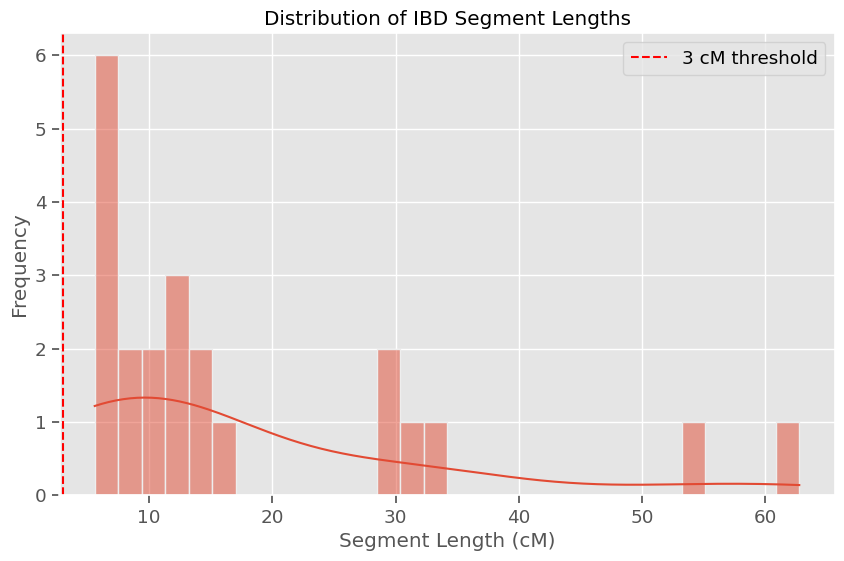

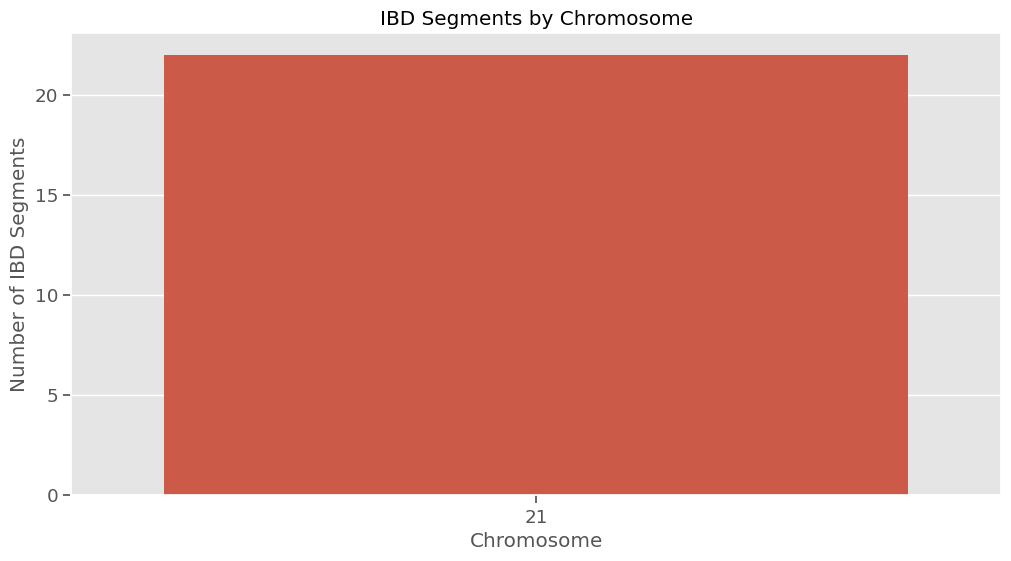


IBD segment length (cM) by chromosome:


,count,mean,median,min,max
chromosome_str,,,,,
21,22,17.75,12.03,5.61,62.74


In [27]:
# --- 3. Explore IBD segments ---

if 'ibd_df' in locals() and not ibd_df.empty:
    
    # Plot distribution of IBD segment lengths
    plt.figure(figsize=(10, 6))
    sns.histplot(ibd_df['length_cm'], bins=30, kde=True)
    plt.xlabel('Segment Length (cM)')
    plt.ylabel('Frequency')
    plt.title('Distribution of IBD Segment Lengths')
    plt.axvline(x=3, color='red', linestyle='--', label='3 cM threshold')
    plt.legend()
    plt.show()
    
    # Plot IBD segments by chromosome
    if 'chromosome' in ibd_df.columns:
        plt.figure(figsize=(12, 6))
        # Convert chromosome to string to handle different data types cleanly
        ibd_df['chromosome_str'] = ibd_df['chromosome'].astype(str)
        chrom_counts = ibd_df['chromosome_str'].value_counts().sort_index()
        
        # Create the bar plot
        sns.barplot(x=chrom_counts.index, y=chrom_counts.values)
        plt.xlabel('Chromosome')
        plt.ylabel('Number of IBD Segments')
        plt.title('IBD Segments by Chromosome')
        plt.xticks(rotation=0)
        plt.show()
        
        # Show summary statistics by chromosome
        print("\nIBD segment length (cM) by chromosome:")
        chrom_stats = ibd_df.groupby('chromosome_str')['length_cm'].agg(['count', 'mean', 'median', 'min', 'max']).round(2)
        display(chrom_stats)

The red line in the histogram represents a kernel density estimate (KDE) of the distribution of IBD segment lengths. It's essentially a smoothed version of the histogram that helps visualize the underlying probability density function of your data. Unlike the histogram bars which show the actual count or frequency in each bin, the KDE curve provides a continuous estimation of the distribution shape.


Summary of TMRCA values (generations):
count     18.000000
mean      59.034102
std      100.945174
min        1.000000
25%        1.000000
50%        2.000000
75%       41.162954
max      257.526478
Name: tmrca, dtype: float64


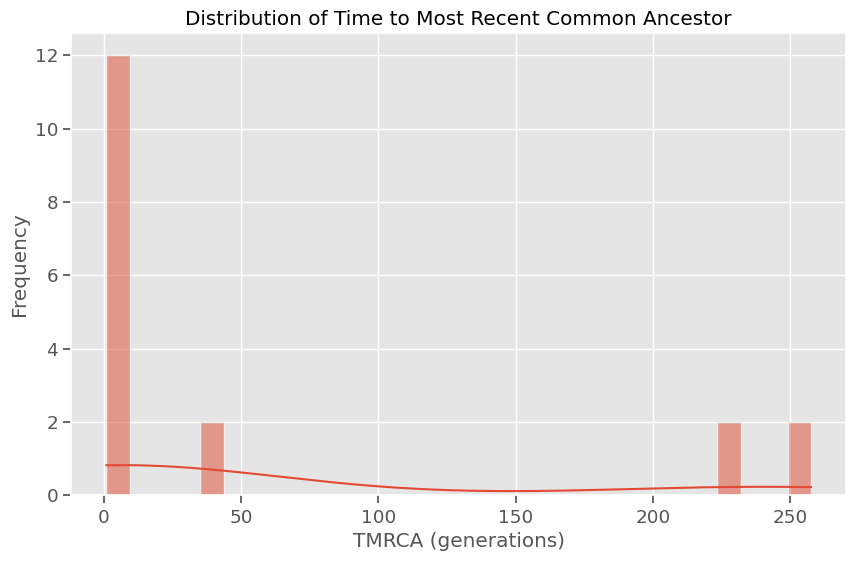

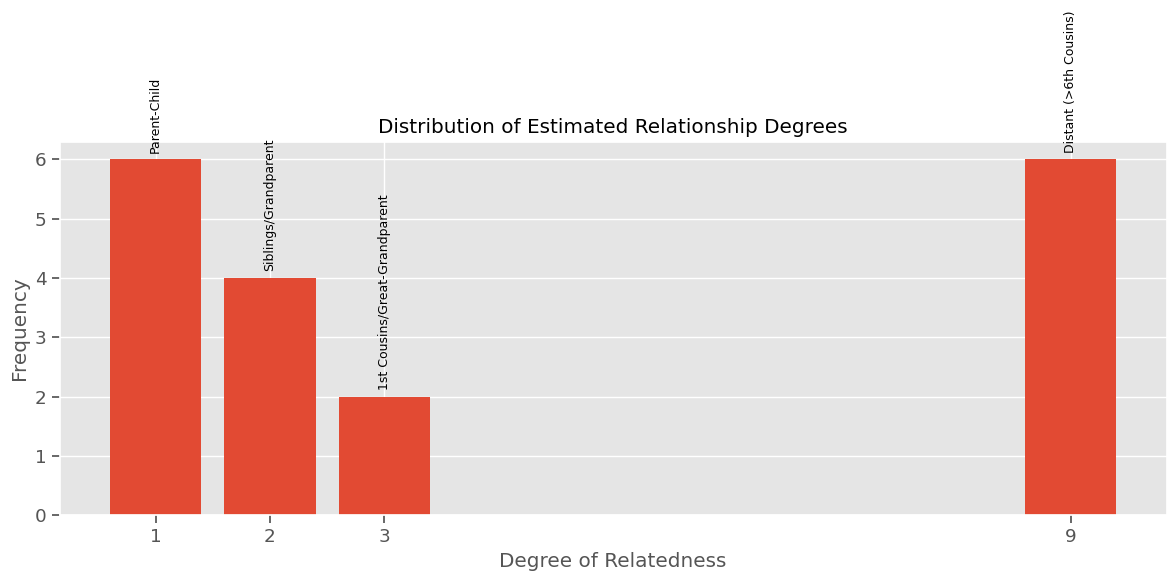

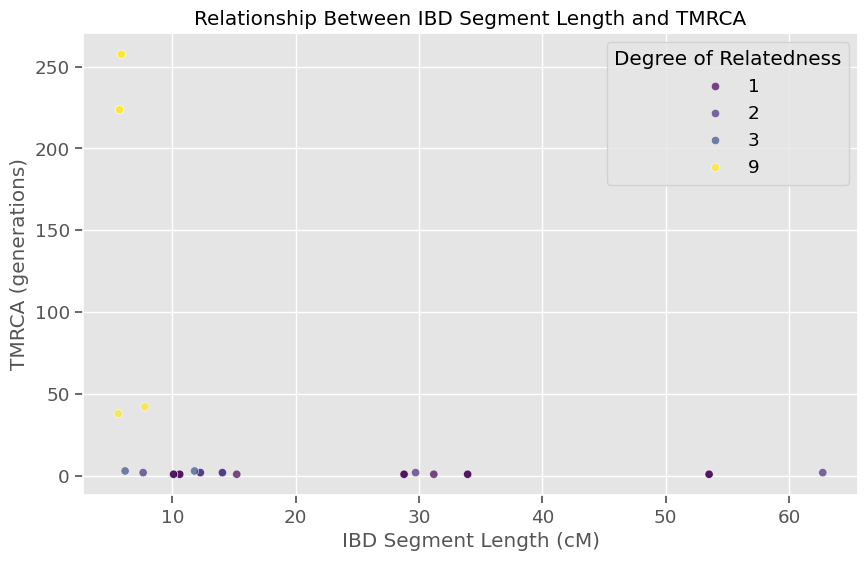

In [28]:
# --- 4. Explore Pairwise MRCA data ---

def estimate_degree_of_relatedness(tmrca):
    """
    Estimate the degree of relatedness based on TMRCA value.
    
    Args:
        tmrca: Time to Most Recent Common Ancestor in generations
        
    Returns:
        (degree, relationship_description)
    """
    if tmrca <= 1:
        return (1, "Parent-Child")
    elif tmrca <= 2:
        return (2, "Siblings/Grandparent")
    elif tmrca <= 3:
        return (3, "1st Cousins/Great-Grandparent")
    elif tmrca <= 5:
        return (4, "1st Cousins once removed/2nd Cousins")
    elif tmrca <= 7:
        return (5, "2nd Cousins once removed/3rd Cousins")
    elif tmrca <= 9:
        return (6, "3rd Cousins once removed/4th Cousins")
    elif tmrca <= 11:
        return (7, "4th Cousins once removed/5th Cousins")
    elif tmrca <= 13:
        return (8, "5th Cousins once removed/6th Cousins")
    else:
        return (9, "Distant (>6th Cousins)")

if 'mrca_df' in locals() and not mrca_df.empty:
    # Add estimated degree of relatedness
    mrca_df['degree'], mrca_df['relationship'] = zip(*mrca_df['tmrca'].apply(estimate_degree_of_relatedness))
    
    # Summary statistics of TMRCA
    print("\nSummary of TMRCA values (generations):")
    print(mrca_df['tmrca'].describe())
    
    # Plot distribution of TMRCA values
    plt.figure(figsize=(10, 6))
    sns.histplot(mrca_df['tmrca'], bins=30, kde=True)
    plt.xlabel('TMRCA (generations)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Time to Most Recent Common Ancestor')
    plt.show()
    
    # Plot distribution of relationship degrees
    plt.figure(figsize=(12, 6))
    degree_counts = mrca_df['degree'].value_counts().sort_index()
    bars = plt.bar(degree_counts.index, degree_counts.values)
    
    # Add relationship labels
    for i, (degree, count) in enumerate(degree_counts.items()):
        rel = mrca_df[mrca_df['degree'] == degree]['relationship'].iloc[0]
        plt.annotate(rel, xy=(degree, count), xytext=(0, 5), 
                     textcoords="offset points", ha='center', va='bottom',
                     rotation=90, fontsize=9)
    
    plt.xlabel('Degree of Relatedness')
    plt.ylabel('Frequency')
    plt.title('Distribution of Estimated Relationship Degrees')
    plt.xticks(degree_counts.index)
    plt.tight_layout()
    plt.show()
    
    # Relationship between segment length and TMRCA
    plt.figure(figsize=(10, 6))
    if 'ibd_df' in locals() and not ibd_df.empty:
        # Create a merged dataset of IBD segments with their TMRCA
        combined_data = pd.merge(
            ibd_df[['node1', 'node2', 'length_cm', 'tmrca']],
            mrca_df[['node1', 'node2', 'tmrca', 'degree', 'relationship']],
            on=['node1', 'node2'],
            how='left',
            suffixes=('_segment', '_mrca')
        )
        
        # Plot the relationship
        sns.scatterplot(data=combined_data, x='length_cm', y='tmrca_segment', 
                       hue='degree', palette='viridis', alpha=0.7)
        plt.xlabel('IBD Segment Length (cM)')
        plt.ylabel('TMRCA (generations)')
        plt.title('Relationship Between IBD Segment Length and TMRCA')
        plt.legend(title='Degree of Relatedness')
        plt.show()

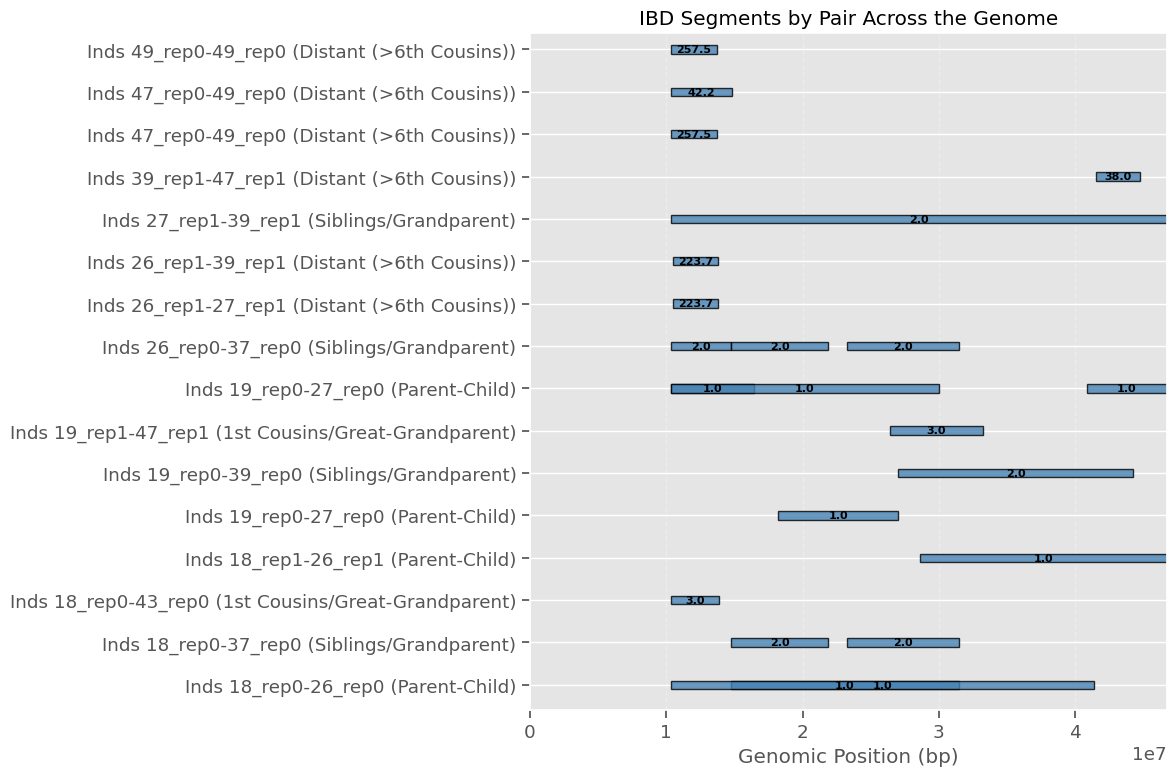

In [29]:
def visualize_mrca_regions(ts, pairwise_mrca_df, max_pairs=None):
    """
    Visualize the genomic regions covered by different MRCAs for all pairs.
    Uses thin horizontal bars for better visualization of overlapping segments.
    
    Args:
        ts: Tree sequence object
        pairwise_mrca_df: DataFrame from calculate_comprehensive_pairwise_mrca
        max_pairs: Maximum number of pairs to show (None for all)
        
    Returns:
        matplotlib figure
    """
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    import numpy as np
    import logging

    # Get unique pairs
    pairs = set(zip(pairwise_mrca_df['node1'], pairwise_mrca_df['node2']))
    if not pairs:
        logging.warning("No pairs found in the DataFrame")
        return None

    # Sort pairs and limit if needed
    pairs_list = sorted(list(pairs))
    if max_pairs and len(pairs_list) > max_pairs:
        pairs_list = pairs_list[:max_pairs]
        print(f"Showing first {max_pairs} of {len(pairs)} pairs")

    # Create a single figure
    fig, ax = plt.subplots(figsize=(12, max(4, len(pairs_list) * 0.5)))

    # Track pair y-positions
    pair_positions = {}
    current_y = 0

    # Add estimated degree of relatedness if not already present
    if 'degree' not in pairwise_mrca_df.columns:
        pairwise_mrca_df['degree'], pairwise_mrca_df['relationship'] = zip(*pairwise_mrca_df['tmrca'].apply(estimate_degree_of_relatedness))

    # Process each pair
    for i, pair in enumerate(pairs_list):
        node1, node2 = pair

        # Filter the DataFrame for this pair
        pair_data = pairwise_mrca_df[
            (pairwise_mrca_df['node1'] == node1) & 
            (pairwise_mrca_df['node2'] == node2)
        ]

        if len(pair_data) == 0:
            continue

        # Get individual IDs if available
        has_ind_ids = 'individual1_id' in pair_data.columns and 'individual2_id' in pair_data.columns
        if has_ind_ids:
            ind1_id = pair_data['individual1_id'].iloc[0]
            ind2_id = pair_data['individual2_id'].iloc[0]
            pair_label = f"Inds {ind1_id}-{ind2_id}"
        else:
            pair_label = f"Nodes {node1}-{node2}"

        # Store this pair's y position
        pair_positions[pair] = current_y

        # Plot each MRCA's regions
        for _, row in pair_data.iterrows():
            mrca = row['mrca_node']
            tmrca = row['tmrca']

            regions = row['covered_regions'].split(';')
            for region in regions:
                start, end = map(int, region.split('-'))
                height = 0.2  # Very thin bar

                # Create horizontal rectangle - use a consistent color
                rect = patches.Rectangle(
                    (start, current_y), width=end - start, height=height, 
                    linewidth=1, edgecolor='black', facecolor='steelblue', 
                    alpha=0.8
                )
                ax.add_patch(rect)

                # For wide enough segments, add TMRCA text in the middle
                if end - start > ts.sequence_length / 20:
                    mid_point = start + (end - start) / 2
                    ax.text(mid_point, current_y + height / 2, f"{tmrca:.1f}",
                            ha='center', va='center', fontsize=8, color='black',
                            fontweight='bold')

        # Increment y position for next pair
        current_y += 1

    # Set plot parameters
    ax.set_ylim(-0.5, current_y - 0.5)
    ax.set_xlim(0, ts.sequence_length)
    ax.set_xlabel("Genomic Position (bp)")

    # Create y-tick labels with pair information
    yticks = []
    yticklabels = []
    for pair, y_pos in pair_positions.items():
        yticks.append(y_pos + 0.1)  # Center of the thin bar
        node1, node2 = pair

        # Get pair data again
        pair_data = pairwise_mrca_df[
            (pairwise_mrca_df['node1'] == node1) & 
            (pairwise_mrca_df['node2'] == node2)
        ]

        # Get label information
        has_ind_ids = 'individual1_id' in pair_data.columns and 'individual2_id' in pair_data.columns
        if has_ind_ids:
            ind1_id = pair_data['individual1_id'].iloc[0]
            ind2_id = pair_data['individual2_id'].iloc[0]
            pair_label = f"Inds {ind1_id}-{ind2_id}"
        else:
            pair_label = f"{node1}-{node2}"

        # Add average TMRCA and relationship if available
        avg_tmrca = pair_data['tmrca'].mean()
        avg_degree = pair_data['degree'].mean() if 'degree' in pair_data.columns else estimate_degree_of_relatedness(avg_tmrca)[0]
        relationship = pair_data['relationship'].iloc[0] if 'relationship' in pair_data.columns else estimate_degree_of_relatedness(avg_tmrca)[1]

        yticklabels.append(f"{pair_label} ({relationship})")

    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)

    # Add grid lines for easier position reference
    ax.grid(True, axis='x', linestyle='--', alpha=0.3)
    ax.set_title("IBD Segments by Pair Across the Genome")
    plt.tight_layout()

    return fig

# Revised usage:
fig = visualize_mrca_regions(ts, mrca_df)
plt.show()

- The numbers displayed inside the bars in the visualization represent the TMRCA (Time to Most Recent Common Ancestor) values, measured in generations.


Total IBD sharing between individual pairs:


,individual1_id,individual2_id,total_sharing_cm,segment_count,relationship
3,18_rep1,26_rep1,84.719746,2,Parent-Child
11,27_rep1,39_rep1,62.740616,1,Siblings/Grandparent
6,19_rep1,27_rep1,44.038537,2,Parent-Child
8,26_rep0,37_rep0,33.948503,3,Siblings/Grandparent
5,19_rep0,39_rep0,29.719442,1,Siblings/Grandparent
0,18_rep0,26_rep0,28.786825,1,Parent-Child
1,18_rep0,37_rep0,26.322810,2,Siblings/Grandparent
4,19_rep0,27_rep0,25.807791,2,Parent-Child
13,47_rep0,49_rep0,13.626982,2,Distant (>6th Cousins)
7,19_rep1,47_rep1,11.797566,1,1st Cousins/Great-Grandparent


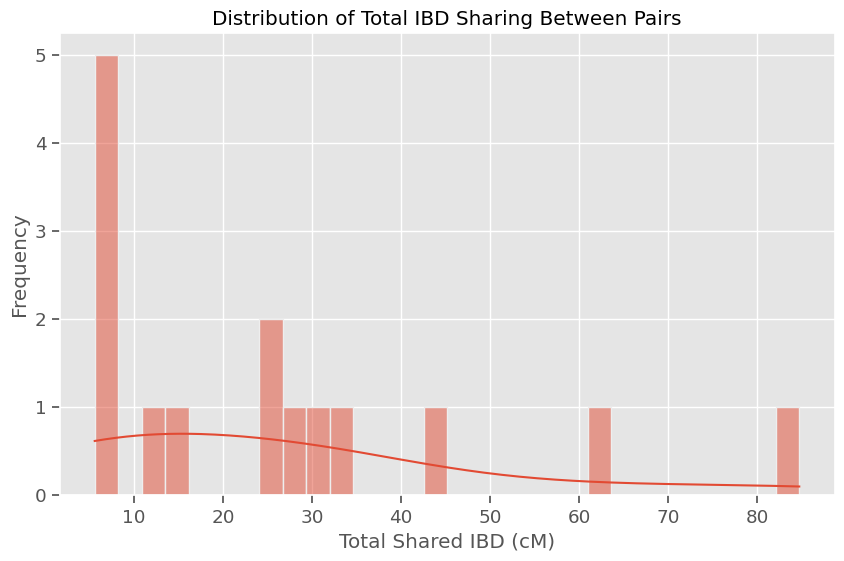

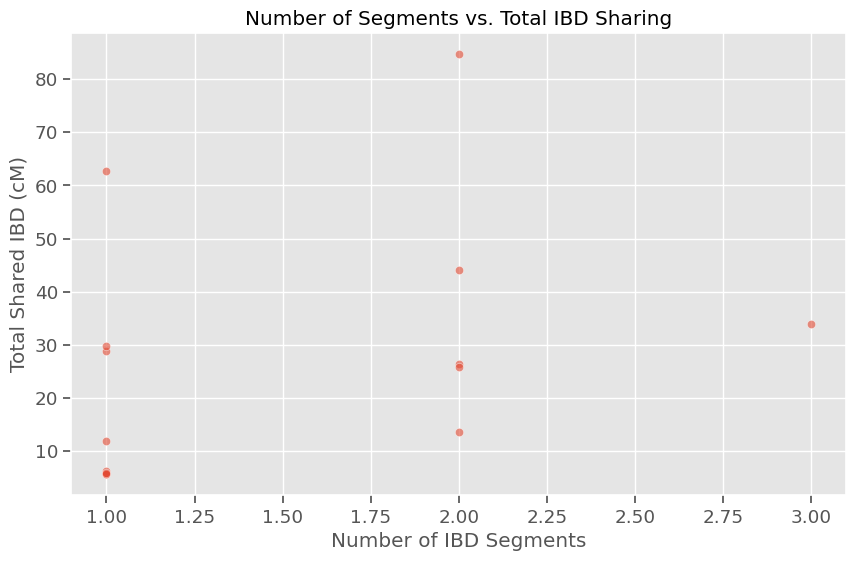

In [30]:
# --- 7. Advanced analysis: Total sharing between pairs ---

# If IBD data is available, calculate total sharing between pairs
if 'ibd_df' in locals() and not ibd_df.empty:
    # Check if individual IDs are in the dataframe
    if 'individual1_id' in ibd_df.columns and 'individual2_id' in ibd_df.columns:
        # Group by individual pairs and sum segment lengths
        pair_sharing = ibd_df.groupby(['individual1_id', 'individual2_id'])['length_cm'].sum().reset_index()
        pair_sharing.columns = ['individual1_id', 'individual2_id', 'total_sharing_cm']
        
        # Add count of segments
        segment_counts = ibd_df.groupby(['individual1_id', 'individual2_id']).size().reset_index(name='segment_count')
        pair_sharing = pair_sharing.merge(segment_counts, on=['individual1_id', 'individual2_id'])
        
        # Add any additional metadata if available (like relationship information)
        if 'mrca_df' in locals() and not mrca_df.empty and 'relationship' in mrca_df.columns:
            # Get most common relationship type for each pair
            relationships = mrca_df.groupby(['individual1_id', 'individual2_id'])['relationship'].agg(
                lambda x: pd.Series.mode(x)[0] if len(pd.Series.mode(x)) > 0 else "Unknown"
            ).reset_index()
            pair_sharing = pair_sharing.merge(relationships, on=['individual1_id', 'individual2_id'], how='left')
        
        print("\nTotal IBD sharing between individual pairs:")
        display(pair_sharing.sort_values('total_sharing_cm', ascending=False).head(10))
    else:
        # Fallback to node-based analysis if individual IDs are not available
        pair_sharing = ibd_df.groupby(['node1', 'node2'])['length_cm'].sum().reset_index()
        pair_sharing.columns = ['node1', 'node2', 'total_sharing_cm']
        
        # Add count of segments
        segment_counts = ibd_df.groupby(['node1', 'node2']).size().reset_index(name='segment_count')
        pair_sharing = pair_sharing.merge(segment_counts, on=['node1', 'node2'])
        
        print("\nTotal IBD sharing between node pairs:")
        display(pair_sharing.sort_values('total_sharing_cm', ascending=False).head(10))
    
    # Plot distribution of total sharing
    plt.figure(figsize=(10, 6))
    sns.histplot(pair_sharing['total_sharing_cm'], bins=30, kde=True)
    plt.xlabel('Total Shared IBD (cM)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Total IBD Sharing Between Pairs')
    plt.show()
    
    # Plot segment count vs total sharing
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='segment_count', y='total_sharing_cm', data=pair_sharing, alpha=0.6)
    plt.xlabel('Number of IBD Segments')
    plt.ylabel('Total Shared IBD (cM)')
    plt.title('Number of Segments vs. Total IBD Sharing')
    plt.show()

In [34]:
# Explicit grouping by individual IDs
group_cols = ['individual1_id', 'individual2_id']

# Aggregate the IBD data for each pair:
# - total_length_bp: sum of shared base pairs.
# - total_length_cm: sum of shared centiMorgans.
# - num_segments: count of segments shared.
agg_df = ibd_df.groupby(group_cols).agg(
    total_length_bp=('length_bp', 'sum'),
    total_length_cm=('length_cm', 'sum'),
    num_segments=('length_bp', 'count')
).reset_index()

print("Aggregated IBD sharing data by pair:")
print(agg_df.head())

Aggregated IBD sharing data by pair:
  individual1_id individual2_id  total_length_bp  total_length_cm  \
0        18_rep0        26_rep0         16693491        28.786825   
1        18_rep0        37_rep0         15264608        26.322810   
2        18_rep0        43_rep0          3575402         6.165545   
3        18_rep1        26_rep1         49129014        84.719746   
4        19_rep0        27_rep0         14965948        25.807791   

   num_segments  
0             1  
1             2  
2             1  
3             2  
4             2  


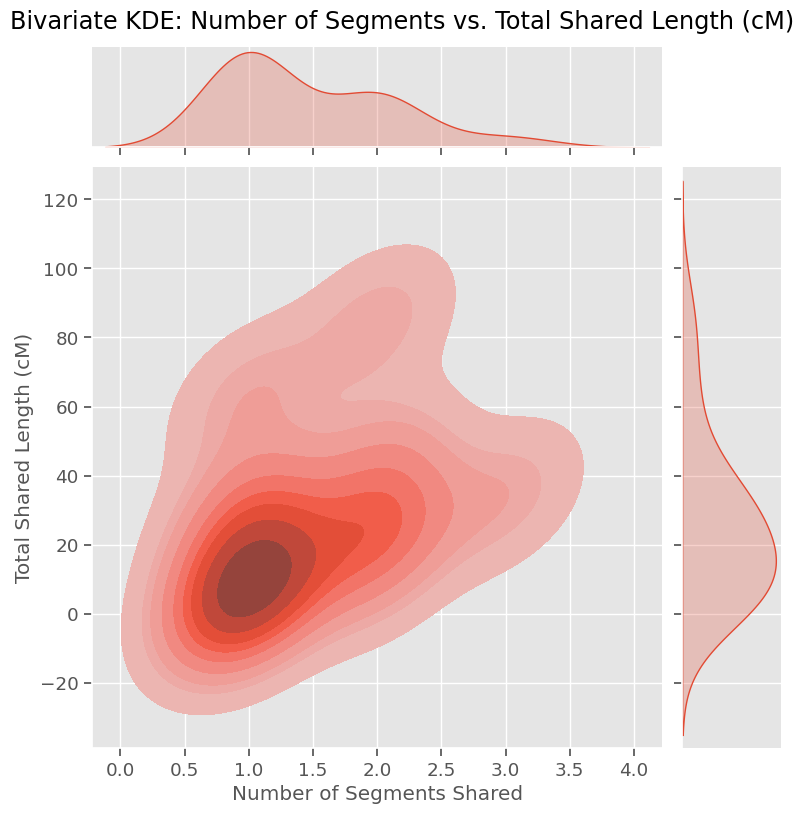

In [35]:
# --- KDE Plot for Total Shared Length (cM) vs. Number of Segments ---

# Create a bivariate KDE plot using seaborn jointplot (for cM)
kde_cm = sns.jointplot(
    data=agg_df,
    x='num_segments',
    y='total_length_cm',
    kind='kde',
    fill=True,
    height=8
)
kde_cm.set_axis_labels("Number of Segments Shared", "Total Shared Length (cM)")
plt.suptitle("Bivariate KDE: Number of Segments vs. Total Shared Length (cM)", y=1.02)
plt.show()

# Interpreting the Three-Part KDE Plot

When you create a Seaborn `jointplot` with `kind='kde'`, you get three main visual elements:

1. **Central Contour Plot (Bivariate KDE)**
   * This contour plot in the middle represents the **two-dimensional kernel density estimate** (KDE) of your data.
   * The x-axis is the "**Number of Segments Shared**" and the y-axis is the "**Total Shared Length (cM)**."
   * The darkest contours (or darkest shaded regions) indicate **areas where data points are most concentrated**.
   * Lighter shading moving outward shows **lower density** of data points.

2. **Top Marginal Distribution (Univariate KDE for the x-axis)**
   * The small KDE plot on the **top** shows the **one-dimensional** distribution of the **x-axis** variable (Number of Segments Shared).
   * This lets you see how frequently different segment counts occur overall, **regardless** of their total shared length.

3. **Right Marginal Distribution (Univariate KDE for the y-axis)**
   * The KDE plot on the **right** shows the **one-dimensional** distribution of the **y-axis** variable (Total Shared Length in cM).
   * This indicates how often different total lengths appear across all pairs, **regardless** of how many segments they share.

### Putting It All Together
* The **central contour** reveals **how Number of Segments and Total Shared Length co-occur** in your dataset.
* The **marginal plots** (top and right) show **how each variable is distributed independently**.

For example, if you see a strong dark contour around **x ≈ 2 segments** and **y ≈ 10–20 cM**, it suggests that many pairs in your dataset share around 2 segments and about 10–20 cM total.

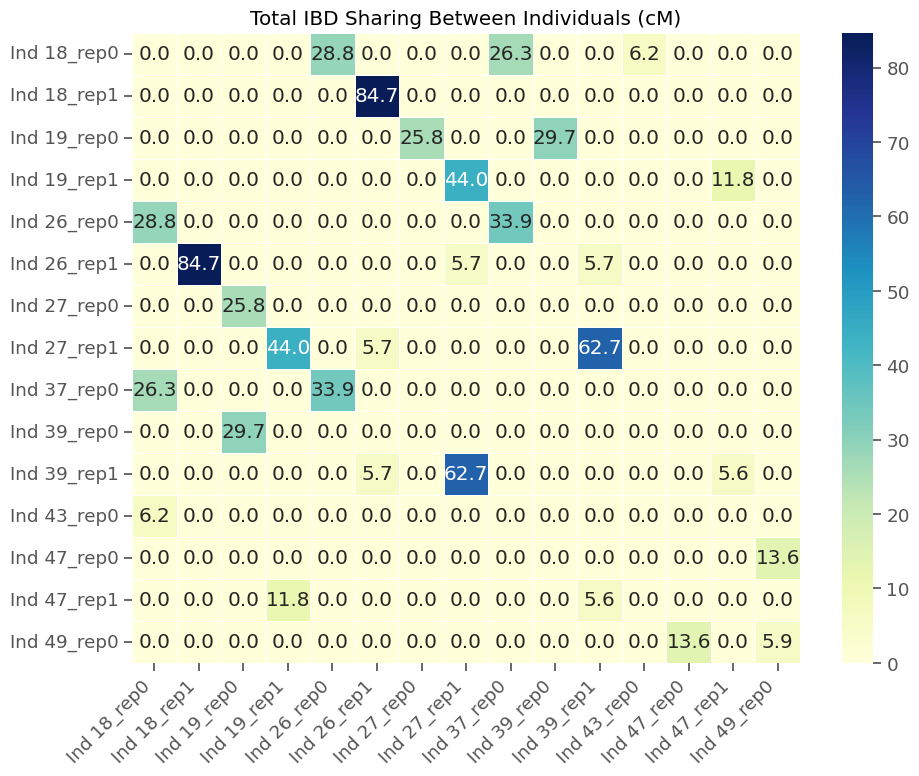

In [33]:
# --- 8. Create IBD sharing heatmap ---

def create_ibd_sharing_heatmap(ibd_df, max_individuals=None):
    """
    Create a heatmap showing total IBD sharing between all individuals.
    
    Args:
        ibd_df: DataFrame with IBD segments
        max_individuals: Maximum number of individuals to include (None for all)
        
    Returns:
        matplotlib figure
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    
    # Check if individual IDs are in the dataframe
    if 'individual1_id' in ibd_df.columns and 'individual2_id' in ibd_df.columns:
        # Group by individual pairs and sum segment lengths
        pair_sharing = ibd_df.groupby(['individual1_id', 'individual2_id'])['length_cm'].sum().reset_index()
        id1_col, id2_col = 'individual1_id', 'individual2_id'
    else:
        # Fallback to node-based analysis
        pair_sharing = ibd_df.groupby(['node1', 'node2'])['length_cm'].sum().reset_index()
        id1_col, id2_col = 'node1', 'node2'
    
    # Get all unique individuals
    all_individuals = sorted(list(set(pair_sharing[id1_col].unique()) | set(pair_sharing[id2_col].unique())))
    
    # Limit the number of individuals if specified
    if max_individuals and len(all_individuals) > max_individuals:
        all_individuals = all_individuals[:max_individuals]
        print(f"Limiting heatmap to first {max_individuals} individuals")
    
    # Create a matrix for the heatmap
    n = len(all_individuals)
    sharing_matrix = np.zeros((n, n))
    
    # Create lookup for individual index
    ind_to_idx = {ind: i for i, ind in enumerate(all_individuals)}
    
    # Fill the matrix with sharing values
    for _, row in pair_sharing.iterrows():
        ind1, ind2 = row[id1_col], row[id2_col]
        if ind1 in ind_to_idx and ind2 in ind_to_idx:
            i, j = ind_to_idx[ind1], ind_to_idx[ind2]
            sharing_matrix[i, j] = row['length_cm']
            sharing_matrix[j, i] = row['length_cm']  # Mirror since sharing is symmetric
    
    # Create labels
    labels = [f"Ind {i}" for i in all_individuals]
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(sharing_matrix, annot=True, fmt=".1f", cmap="YlGnBu", 
                    xticklabels=labels, yticklabels=labels, linewidths=0.5)
    
    # Adjust labels
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.title("Total IBD Sharing Between Individuals (cM)")
    plt.tight_layout()
    
    return plt.gcf()

# If IBD data is available, create a heatmap
if 'ibd_df' in locals() and not ibd_df.empty:
    # Create and show the heatmap
    fig = create_ibd_sharing_heatmap(ibd_df)
    plt.show()

# Predicting Degrees of Relatedness and TMRCA Using Segment Sharing Parameters

## The Machine Learning Approach

When predicting multiple dependent variables (degrees of relatedness and TMRCA) based on segment sharing parameters, you need a robust machine learning approach that can handle:

1. **Multiple Input Features** (segment sharing parameters):
   * Number of shared segments
   * Total shared length (cM)
   * Length of longest segment
   * Average segment length
   * Distribution of segment lengths
   * Chromosomal locations of segments

2. **Multiple Output Variables** (what you want to predict):
   * Degree of relatedness
   * TMRCA (Time to Most Recent Common Ancestor)

## Why XGBoost Is Appropriate

XGBoost (eXtreme Gradient Boosting) is an excellent choice for this problem because:

1. **Superior Performance**: XGBoost consistently outperforms other algorithms on structured/tabular data problems.

2. **Handles Non-linear Relationships**: The relationship between genetic sharing parameters and relatedness is complex and non-linear.

3. **Feature Importance**: XGBoost provides insights into which segment parameters are most predictive of relatedness.

4. **Handles Missing Data**: Can work with incomplete genetic data.

5. **Multi-output Capability**: Can be configured for multi-target regression to predict both degree of relatedness and TMRCA simultaneously.

## Implementation Approach

```python
# Basic implementation structure
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split

# Prepare your data
X = df[['num_segments', 'total_cm', 'longest_segment', 'avg_segment_length', ...]]
y = df[['degree_of_relatedness', 'tmrca_years']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Multi-output regression with XGBoost
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1
)
multi_output_model = MultiOutputRegressor(xgb_model)

# Train the model
multi_output_model.fit(X_train, y_train)

# Make predictions
predictions = multi_output_model.predict(X_test)
```

## Alternatives to Consider

1. **Random Forests**: Another ensemble method that works well for this type of problem.

2. **Neural Networks**: Deep learning approaches for more complex pattern recognition if you have sufficient data.

3. **Bayesian Models**: When you want to incorporate prior knowledge about genetic inheritance patterns.

## Evaluation Metrics

For this specific problem:

* **RMSE (Root Mean Squared Error)**: For continuous predictions like TMRCA
* **Classification Metrics**: For discretized relationship categories
* **Calibration Plots**: To assess probability estimates of different relationship degrees

The choice of XGBoost or similar ensemble methods provides the right balance of predictive power and interpretability needed for genetic relationship inference.

Although this lab does not require you to run the machine learning model, it is useful for you to understand why we need to use that approach.

# Inverse Genetic Relationship Inference: Two Directions of Analysis

## Direction 1: From Known Relationship to Probable IBD Sharing

When you know the genealogical relationship (generation of ancestor or degree of relatedness), predicting the probable IBD sharing pattern is a **forward probability problem**:

```
Known Relationship → Probable IBD Sharing
```

### Key Characteristics:

1. **Probabilistic Distribution**: For any known relationship (e.g., first cousins), there exists a **distribution** of possible IBD sharing values, not a single value.

2. **Theoretical Foundation**: This direction is well-supported by genetic theory. We can calculate expected values:
   * First cousins share ~12.5% of their DNA on average
   * Second cousins share ~3.125% on average

3. **Variations Around the Mean**: Due to recombination randomness, actual sharing can vary significantly:
   * First cousins might share anywhere from ~7-14% of their DNA
   * Second cousins might share ~1-5%

4. **More Predictable for Closer Relations**: The distribution is tighter for closer relationships, becoming much wider for distant ones.

5. **Mathematical Models**: This direction uses probability theory and can be modeled with binomial or normal distributions.

## Direction 2: From Observed IBD Sharing to Inferring Relationship

When you observe IBD sharing patterns and want to infer the genealogical relationship, you're solving an **inverse probability problem**:

```
Observed IBD Sharing → Inferred Relationship
```

### Key Characteristics:

1. **Multiple Possible Explanations**: A specific amount of shared DNA could indicate several different possible relationships.

2. **Bayesian Inference Required**: Must consider prior probabilities of different relationships in the population.

3. **Overlapping Distributions**: The sharing distributions for adjacent relationship degrees overlap significantly:
   * 5% shared DNA could indicate 2nd cousins, 1st cousins twice removed, half 1st cousins, etc.

4. **More Features Improve Accuracy**: Using multiple parameters improves discrimination:
   * Total shared cM
   * Number of segments
   * Length distribution of segments
   * Longest segment

5. **Machine Learning Approach**: This direction typically requires supervised learning algorithms (like XGBoost) to handle the complex, overlapping distributions.

## Why These Directions Are Different

1. **Statistical Asymmetry**: The probability P(IBD | Relationship) is not the same as P(Relationship | IBD).

2. **Information Content**: Known relationships provide more constraint than observed IBD patterns.

3. **Uncertainty Scale**: Relationship inference generally has higher uncertainty than IBD prediction.

4. **Required Methods**: 
   * Direction 1 (Relationship → IBD): Can use direct probability calculations
   * Direction 2 (IBD → Relationship): Requires more complex statistical/ML approaches

5. **Real-world Applications**:
   * Direction 1: Used in simulations, genetic counseling, and theoretical work
   * Direction 2: Used in consumer genetic testing, unknown parentage cases, and genetic genealogy

This fundamental asymmetry explains why inferring relationships from genetic sharing is more challenging than predicting sharing patterns from known relationships, and why sophisticated machine learning approaches like XGBoost are particularly valuable for the relationship inference direction.

# Appendix

### Here are some examples of how to run the script using various arguments

In [ ]:
%%bash

# RUN IN TERMINAL WINDOW

# For simulating the autosomes
poetry run python scripts_support/msprime_simulation.py --num-replicates 2

# For simulating just a few chromosomes to test:
poetry run python scripts_support/msprime_simulation.py --which-chromosomes 21 --num-replicates 2

# To specify a different location for the results directory other than what in your .env file:
poetry run python scripts_support/msprime_simulation.py --results-dir ./my_results --num-replicates 5 --which-chromosomes 21,22

# Understanding the stdpopsim Warning Messages

When running the msprime simulation script, you might encounter warning messages similar to:

```
FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.head(1) - 1), rate=0
```

## What These Warnings Mean

These are `FutureWarning` messages from the pandas library, which is used by the stdpopsim package. They indicate that the code is using a deprecated method that will be removed in future versions of pandas.

Specifically, the warnings are about:

1. Converting a pandas Series with a single value to an integer using `int(series)` 
2. The recommended approach is to use `int(series.iloc[0])` instead

## Why You're Seeing These Warnings

The warnings are coming from the demographic models in the stdpopsim package (version 0.2.0), specifically in the HomSap/demographic_models.py file. This is not an issue with your simulation script but with the library it depends on.

These warnings appear when:
- The script loads the demographic model using `species.get_demographic_model("AmericanAdmixture_4B11")`
- The demographic model code uses pandas to process timing information

## Impact on Your Simulations

The good news is that these warnings:
- Don't affect the correctness of your simulation results
- Don't cause the script to crash or fail
- Are purely informational about future compatibility issues

## Potential Solutions

If you find the warnings distracting, you have several options:

1. **Suppress the warnings in your script**:
   ```python
   import warnings
   warnings.filterwarnings("ignore", category=FutureWarning)
   ```

2. **Update the stdpopsim package** (if a newer version is available):
   ```bash
   pip install --upgrade stdpopsim
   ```
   or
   ```bash
   poetry update stdpopsim
   ```

3. **Create a local patch** for the stdpopsim library if you have the technical skills and need to fix it immediately.

4. **Report the issue** to the stdpopsim developers on their GitHub repository.

## Recommendation

For most users, simply ignoring these warnings is reasonable as they don't affect simulation results. If you're developing code that others will use, consider adding a warning filter to prevent confusion.